In [1]:
from data_processor import DataProcessor
import numpy as np
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
def evaluate(model, x_valid, y_valid):
    error = mean_squared_error(y_valid.ravel(), model.predict(x_valid))
    var = np.var(y_valid.ravel())
    print("The MSE error is: ", error)
    print("The variance of the validation set is: ", var)
    r_2 = 1 - error / var

    print("The model explians" ,r_2 ," of the variance in data")

In [3]:
file_1 = "../data/Train.csv"
file_2 = "../data/additional_data/trainRoot_edited.csv"

processor = DataProcessor(file_1, file_2, test = False, minimal = True)
x_train, x_valid, y_train, y_valid = processor.get_numpy_data(fillna = True, additional = True,
                                                                            encode = True, np_split = True, enocde_user = False,
                                                                            normalize = True, drop_ones = True)

In [14]:
param_dist = {'objective':'reg:squarederror', 'n_estimators':100, 'max_depth':1}
bst = xgb.XGBModel(**param_dist)
bst.fit(x_train, y_train.ravel(), eval_set=[(x_valid, y_valid)], verbose = True)

[0]	validation_0-rmse:1742.03
[1]	validation_0-rmse:1611.01
[2]	validation_0-rmse:1495.23
[3]	validation_0-rmse:1395.75
[4]	validation_0-rmse:1307.06
[5]	validation_0-rmse:1231.98
[6]	validation_0-rmse:1164.83
[7]	validation_0-rmse:1108.95
[8]	validation_0-rmse:1059.39
[9]	validation_0-rmse:1018.06
[10]	validation_0-rmse:981.759
[11]	validation_0-rmse:951.883
[12]	validation_0-rmse:926.18
[13]	validation_0-rmse:903.7
[14]	validation_0-rmse:885.379
[15]	validation_0-rmse:869.543
[16]	validation_0-rmse:855.691
[17]	validation_0-rmse:844.656
[18]	validation_0-rmse:834.763
[19]	validation_0-rmse:826.977
[20]	validation_0-rmse:819.747
[21]	validation_0-rmse:813.855
[22]	validation_0-rmse:809.016
[23]	validation_0-rmse:805.045
[24]	validation_0-rmse:801.412
[25]	validation_0-rmse:798.1
[26]	validation_0-rmse:795.629
[27]	validation_0-rmse:793.345
[28]	validation_0-rmse:791.334
[29]	validation_0-rmse:789.732
[30]	validation_0-rmse:788.213
[31]	validation_0-rmse:786.973
[32]	validation_0-rmse:

In [15]:
evaluate(bst, x_valid, y_valid)

The MSE error is:  599849.963074
The variance of the validation set is:  931876.12059
The model explians 0.356298600404  of the variance in data


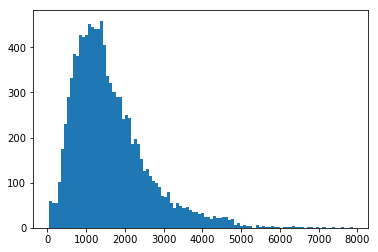

In [9]:
plt.hist(y_train, bins = 100)
plt.show()